# lady testing tea

Purported to be loosely based on an event in Fisher's life, the experiment is based on a claim by a lady friend of Fisher's that when presented with a cup of tea she could that she could discern whether milk or tea was poured first into her cup. In the experiment the lady is presented with 8 cups of tea, four of which have the milk poured first and four of which have the tea poured first. Fisher's lady friend is then asked to select which cups have the milk poured first. The probability of the lady being able to select the four cups, with milk poured first, correctly is low enough that this outcome would be unlikely. Therefore, if over multiple runs of the experiment if the lady correctly selects the cups with milk poured in first, a statistical unlikelihood, the lady had the ability to discern the order in which tea and milk were poured in the cup.



In [1]:
import math 


In [2]:
no_cups = 8 
no_cups_milk_first = 4 
no_cups_tea_first = 4 


In [3]:
ways = math.comb(no_cups, no_cups_milk_first)
ways 


70

In [4]:
ways_ordered = 8 * 7 * 6 * 5 

ways_ordered

1680

In [5]:
no_shuffles = 4 * 3 * 2 * 1 
no_shuffles

24

In [6]:
no_combs = ways_ordered // no_shuffles
no_combs

70

-------------------------------------

In [7]:
import numpy as np 
from scipy.stats import fisher_exact 

In [8]:
cups_total = 8 
cups_milk_first = 4 
cups_tea_first = 4 

In [9]:
np.random.seed(42)
actual_cups = np.array([1]*cups_milk_first + [0]*cups_tea_first)
np.random.shuffle(actual_cups) 


In [10]:
lady_guesses = np.array([1]*cups_milk_first + [0]*cups_tea_first)

# Now we will count her correct guesses:
# Number of true positives (correct milk first identification) and false positives
true_positives = np.sum((actual_cups == 1) & (lady_guesses == 1))
false_positives = np.sum((actual_cups == 0) & (lady_guesses == 1))

# Create the contingency table
# Table of the format [[True Positives, False Positives], [False Negatives, True Negatives]]
contingency_table = np.array([[true_positives, false_positives], 
                              [cups_milk_first - true_positives, cups_tea_first - false_positives]])


In [11]:
oddsratio, p_value = fisher_exact(contingency_table, alternative='greater')

contingency_table, p_value

(array([[2, 2],
        [2, 2]]),
 0.7571428571428571)

----------------------------------------------------------------------------

In [12]:
import numpy as np
# A numpy random number generator
rng = np.random.default_rng()

import pandas as pd
# Safe setting for Pandas.  Needs Pandas version >= 1.5.
pd.set_option('mode.copy_on_write', True)

# Load the library for plotting, name it 'plt'
import matplotlib.pyplot as plt
# Make plots look a little more fancy
plt.style.use('fivethirtyeight')

In [13]:
# Just run the code in this cell.
# Make an empty DataFrame to store the eight cups.
tea_df = pd.DataFrame()
# insert a column that records whether Fisher had in fact poured the milk
# before the tea, into that cup:
tea_df['milk_first'] = np.repeat(['yes', 'no'], [4, 4])
# Add a column recording which cups Muriel chose as her guesses for the
# cups where Fisher had poured the milk first:
tea_df['says_milk_first'] = np.repeat(['yes', 'no'], [4, 4])
# Take a sample (without replacement) of 8 rows.
# This has the effect of putting rows in random order.
tea_df = tea_df.sample(8, replace=False)
# Reset the row labels to throw away the labels showing the original order.
tea_df = tea_df.reset_index(drop=True)

In [14]:
# Show our reconstruction of Fisher's table
tea_df

,milk_first,says_milk_first
0,yes,yes
1,no,no
2,yes,yes
3,no,no
4,no,no
5,yes,yes
6,yes,yes
7,no,no


In [15]:
milk_first = tea_df['milk_first']
says_milk_first = tea_df['says_milk_first']
says_milk_first

0    yes
1     no
2    yes
3     no
4     no
5    yes
6    yes
7     no
Name: says_milk_first, dtype: object

In [16]:
counts_tab = pd.crosstab(milk_first, says_milk_first)
counts_tab

says_milk_first,no,yes
milk_first,,
no,4,0
yes,0,4


In [17]:
milk_first_correct = counts_tab.loc['yes', 'yes']
milk_first_correct

4

In [18]:
# Make the random association.
fake_says = rng.permutation(says_milk_first)
fake_says

array(['yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no'], dtype=object)

In [19]:
fake_counts_tab = pd.crosstab(milk_first, fake_says)
fake_counts_tab

col_0,no,yes
milk_first,,
no,2,2
yes,2,2


In [20]:
fake_mf_correct = fake_counts_tab.loc['yes', 'yes']
fake_mf_correct

2

In [21]:
# Notice we're only using 1000 iterations, not our usual 10_000
# This is to save some time; the crosstab is a little slow.
n_iters = 1000
fake_mf_corrects = np.zeros(n_iters)
for i in np.arange(n_iters):
    fake_says = rng.permutation(says_milk_first)
    fake_counts_tab = pd.crosstab(milk_first, fake_says)
    fake_mf_correct = fake_counts_tab.loc['yes', 'yes']
    fake_mf_corrects[i] = fake_mf_correct
fake_mf_corrects[:10]

array([2., 1., 2., 2., 1., 2., 1., 2., 2., 1.])

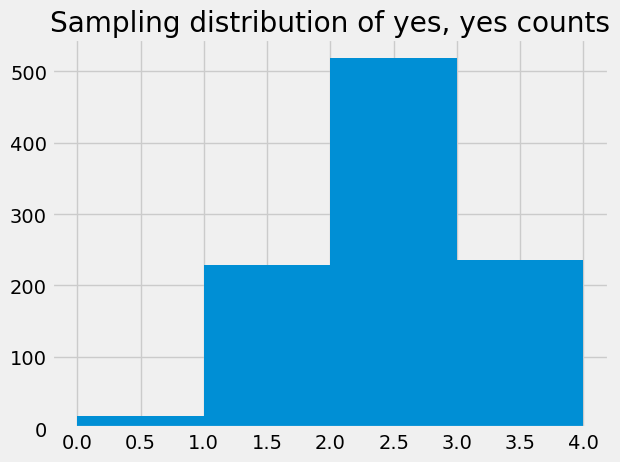

In [22]:
plt.hist(fake_mf_corrects, bins=np.arange(5));
plt.title('Sampling distribution of yes, yes counts');

In [23]:
np.count_nonzero(fake_mf_corrects == 4) / n_iters

0.021

In [24]:
# Probability that Muriel will select all 4 milk-first cups
# correctly if she is just guessing.
4 / 8 * 3 / 7 * 2 / 6 * 1 / 5

0.014285714285714285

In [25]:
# Get stats module from Scipy.
import scipy.stats as sps

In [26]:
# Calculate Fisher's Exact Test p-value
odds_ratio, p_value = sps.fisher_exact(counts_tab,
                                       alternative='greater')
p_value

0.014285714285714284

------------------------------------------------------------------------------

In [27]:
total_nums_cups = 12 
def fact(num):
    factorial=1
    for i in range(1,num + 1):
        factorial = factorial*i
    return factorial

perms_total = fact(total_nums_cups)
print(f'The total number of permutations for {total_nums_cups} cups is {perms_total}.')
    

The total number of permutations for 12 cups is 479001600.
